<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Algorithmic Trading

## With Machine & Deep Learning

**Reading Data, Backtesting, Random Walks, Prediction with ML & DL**

**_ODSC Europe 2017_**

Dr. Yves J. Hilpisch

The Python Quants GmbH

**12. October 2017**

<img src="http://hilpisch.com/images/finaince_visual_low.png" width=50% align=left>

## The Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## The Data

In [2]:
data = pd.read_csv('http://hilpisch.com/eurusd.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 11 columns):
Date          2820 non-null object
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 242.4+ KB


In [4]:
data.head()

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
0,6/3/2007,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
1,6/4/2007,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2,6/5/2007,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
3,6/6/2007,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
4,6/7/2007,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238


In [5]:
data = pd.read_csv('http://hilpisch.com/eurusd.csv', index_col=0,
                  parse_dates=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [7]:
data.tail()

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165
2017-05-30,21:00:00,1.11842,1.12517,1.11638,1.12418,1.11882,1.12530,1.11651,1.12434,293536
2017-05-31,21:00:00,1.12418,1.12562,1.11997,1.12103,1.12434,1.12574,1.12027,1.12133,235113


In [8]:
data = data[['CloseAsk', 'CloseBid']]

In [9]:
data = data[data.index > '2014-1-1']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2014-01-02 to 2017-05-31
Data columns (total 2 columns):
CloseAsk    1060 non-null float64
CloseBid    1060 non-null float64
dtypes: float64(2)
memory usage: 24.8 KB


## SMA-Based Strategy

### Formulating a Financial Trading Strategy

In [11]:
data['Mid'] = data.mean(axis=1)

In [12]:
data.tail()

,CloseAsk,CloseBid,Mid
Date,,,
2017-05-27,1.11788,1.11681,1.117345
2017-05-28,1.11660,1.11622,1.116410
2017-05-29,1.11882,1.11842,1.118620
2017-05-30,1.12434,1.12418,1.124260
2017-05-31,1.12133,1.12103,1.121180


In [13]:
data['SMA1'] = data['Mid'].rolling(10).mean()

In [14]:
data['SMA2'] = data['Mid'].rolling(60).mean()

In [15]:
data.head(12)

,CloseAsk,CloseBid,Mid,SMA1,SMA2
Date,,,,,
2014-01-02,1.35931,1.35886,1.359085,NaN,NaN
2014-01-04,1.35965,1.35905,1.359350,NaN,NaN
2014-01-05,1.36286,1.36270,1.362780,NaN,NaN
2014-01-06,1.36163,1.36148,1.361555,NaN,NaN
2014-01-07,1.35755,1.35748,1.357515,NaN,NaN
2014-01-08,1.36068,1.36069,1.360685,NaN,NaN
2014-01-09,1.36701,1.36667,1.366840,NaN,NaN
2014-01-11,1.36815,1.36755,1.367850,NaN,NaN
2014-01-12,1.36718,1.36705,1.367115,NaN,NaN


In [16]:
data.dropna(inplace=True)

In [17]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2
Date,,,,,
2014-03-12,1.38705,1.38661,1.386830,1.383361,1.367326
2014-03-13,1.39184,1.39050,1.391170,1.385129,1.367861
2014-03-15,1.39136,1.39040,1.390880,1.386785,1.368387
2014-03-16,1.39228,1.39211,1.392195,1.388671,1.368877
2014-03-17,1.39346,1.39330,1.393380,1.389401,1.369407


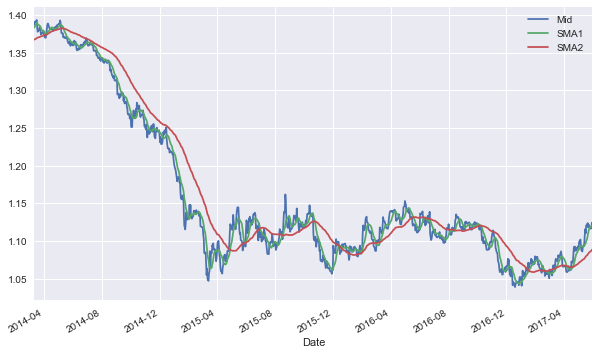

In [18]:
data[['Mid', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

In [19]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

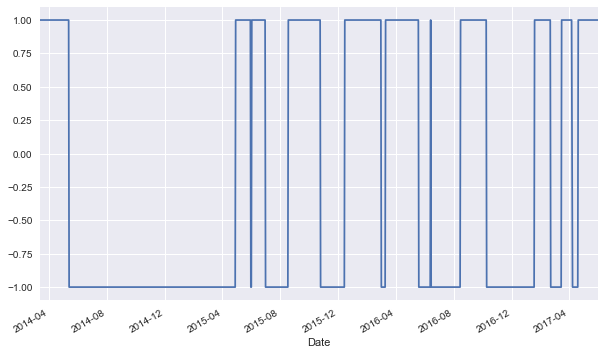

In [20]:
data['Position'].plot(figsize=(10, 6));

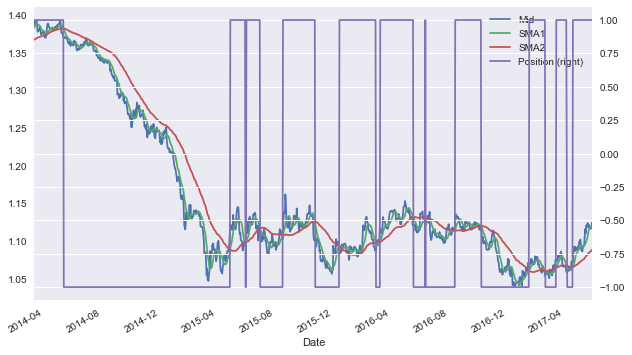

In [21]:
data[['Mid', 'SMA1', 'SMA2', 'Position']].plot(figsize=(10, 6),
                                              secondary_y='Position');

### Backtesting the Financial Trading Strategy

In [22]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

In [23]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2,Position,Returns
Date,,,,,,,
2014-03-12,1.38705,1.38661,1.386830,1.383361,1.367326,1,NaN
2014-03-13,1.39184,1.39050,1.391170,1.385129,1.367861,1,0.003125
2014-03-15,1.39136,1.39040,1.390880,1.386785,1.368387,1,-0.000208
2014-03-16,1.39228,1.39211,1.392195,1.388671,1.368877,1,0.000945
2014-03-17,1.39346,1.39330,1.393380,1.389401,1.369407,1,0.000851


In [24]:
data.dropna(inplace=True)

In [25]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [26]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,,
2014-03-13,1.39184,1.39050,1.391170,1.385129,1.367861,1,0.003125,NaN
2014-03-15,1.39136,1.39040,1.390880,1.386785,1.368387,1,-0.000208,-0.000208
2014-03-16,1.39228,1.39211,1.392195,1.388671,1.368877,1,0.000945,0.000945
2014-03-17,1.39346,1.39330,1.393380,1.389401,1.369407,1,0.000851,0.000851
2014-03-18,1.38338,1.38321,1.383295,1.388929,1.369837,1,-0.007264,-0.007264


In [27]:
data.dropna(inplace=True)

In [28]:
data[['Returns', 'Strategy']].sum()

Returns    -0.215763
Strategy    0.118549
dtype: float64

In [29]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     0.805926
Strategy    1.125862
dtype: float64

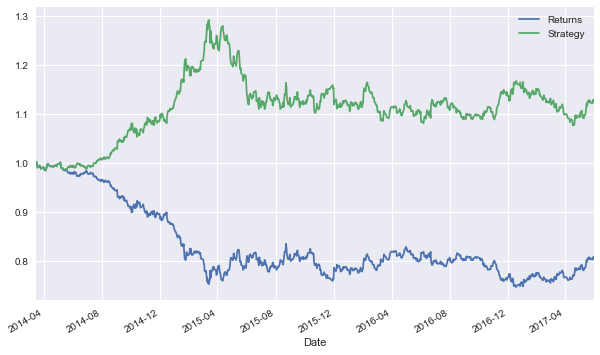

In [30]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

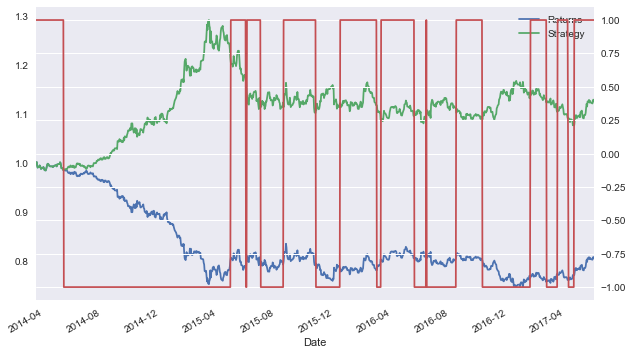

In [31]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position');

## Random Walk Hypothesis

### Simulating a Random Walk 

In [32]:
S0 = 100
T = 1.0
sigma = 0.2
M = 200
dt = T / M

In [33]:
rn = np.random.standard_normal((M+1, 10))

In [34]:
rn.mean()

0.01370042805259388

In [35]:
rn.std()

0.98925162511609477

In [36]:
rn[0] = 0.0

In [37]:
S = S0 * np.exp(((-0.5 * sigma ** 2) * dt +
                 sigma * rn * dt ** 0.5).cumsum(axis=0))

In [38]:
S[0] = S0

In [39]:
S

array([[ 100.        ,  100.        ,  100.        , ...,  100.        ,
         100.        ,  100.        ],
       [ 101.32099721,  101.41947601,   95.5463546 , ...,  100.4678983 ,
         100.92474823,  101.9330723 ],
       [ 101.23463987,  103.5092721 ,   96.58726058, ...,  100.74987279,
          99.26092254,  104.61268223],
       ..., 
       [ 146.79126023,  100.36004461,   90.45954636, ...,   94.15214104,
          65.83080107,   84.74038385],
       [ 147.55735608,   99.56530547,   90.84067555, ...,   94.79626449,
          66.41936072,   81.60742871],
       [ 142.67612362,  100.0373204 ,   92.43988359, ...,   96.38441732,
          65.41297431,   81.81257203]])

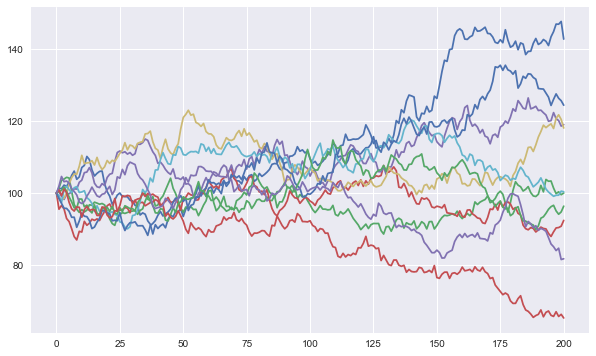

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(S);

In [41]:
df = pd.DataFrame(S[:, 0], columns=['path'])

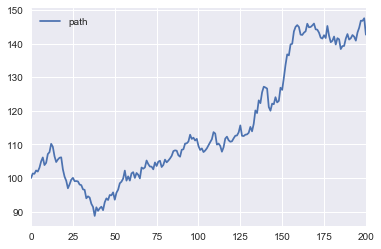

In [42]:
df.plot();

In [43]:
cols = []
lags = 5
for lag in range(1, lags+1):
    col = 'Lag_%d' % lag
    df[col] = df['path'].shift(lag)
    cols.append(col)

In [44]:
df.head(9)

,path,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
0,100.000000,NaN,NaN,NaN,NaN,NaN
1,101.320997,100.000000,NaN,NaN,NaN,NaN
2,101.234640,101.320997,100.000000,NaN,NaN,NaN
3,102.217132,101.234640,101.320997,100.000000,NaN,NaN
4,101.889403,102.217132,101.234640,101.320997,100.000000,NaN
5,103.037219,101.889403,102.217132,101.234640,101.320997,100.000000
6,104.911359,103.037219,101.889403,102.217132,101.234640,101.320997
7,106.103930,104.911359,103.037219,101.889403,102.217132,101.234640
8,103.830050,106.103930,104.911359,103.037219,101.889403,102.217132


In [45]:
df.dropna(inplace=True)

In [46]:
reg = np.linalg.lstsq(df[cols], df['path'])[0]

In [47]:
reg

array([ 0.98405192,  0.10048256, -0.00633048, -0.19898919,  0.12250492])

In [48]:
df['Pred'] = np.dot(df[cols], reg)

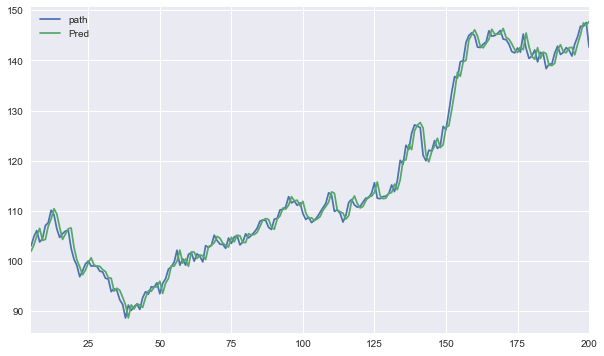

In [49]:
df[['path', 'Pred']].plot(figsize=(10, 6));

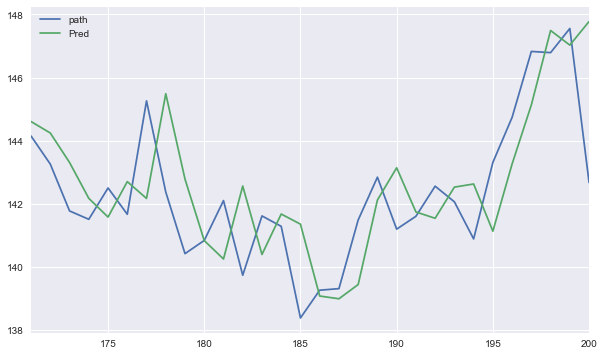

In [50]:
df[['path', 'Pred']].iloc[-30:].plot(figsize=(10, 6));

### Real Financial Data

In [51]:
df = pd.DataFrame(data['Mid'])

In [52]:
df.columns = ['path']

In [53]:
df.head()

,path
Date,
2014-03-15,1.390880
2014-03-16,1.392195
2014-03-17,1.393380
2014-03-18,1.383295
2014-03-19,1.377825


In [54]:
cols = []
lags = 15
for lag in range(1, lags+1):
    col = 'Lag_%d' % lag
    df[col] = df['path'].shift(lag)
    cols.append(col)

In [55]:
df.head(9)

,path,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15
Date,,,,,,,,,,,,,,,,
2014-03-15,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-16,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-17,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-18,1.383295,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-19,1.377825,1.383295,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-20,1.379470,1.377825,1.383295,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,1.379750,1.379470,1.377825,1.383295,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,1.383900,1.379750,1.379470,1.377825,1.383295,1.393380,1.392195,1.390880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,1.382670,1.383900,1.379750,1.379470,1.377825,1.383295,1.393380,1.392195,1.39088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.dropna(inplace=True)

In [57]:
reg = np.linalg.lstsq(df[cols], df['path'])[0]

In [58]:
reg

array([ 0.97598382,  0.03137281, -0.04484821,  0.04270276, -0.00554608,
        0.03255163, -0.05976396,  0.00788299, -0.01158404,  0.09053766,
       -0.08261789, -0.03855312,  0.13704409, -0.06949812, -0.00593118])

In [59]:
df['Pred'] = np.dot(df[cols], reg)

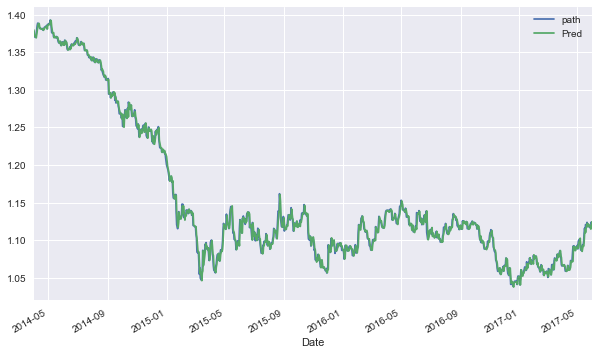

In [60]:
df[['path', 'Pred']].plot(figsize=(10, 6));

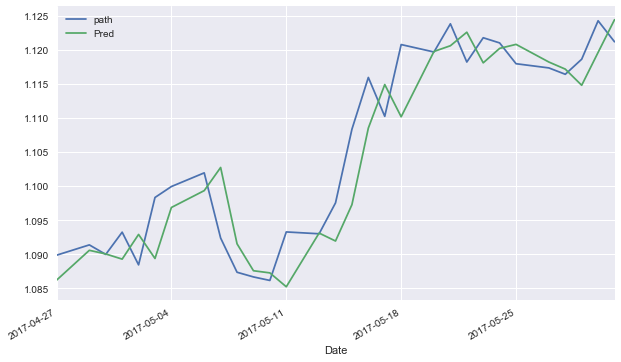

In [61]:
df[['path', 'Pred']].iloc[-30:].plot(figsize=(10, 6));

<img src="http://hilpisch.com/images/finaince_logo.png" width=300px align=left>

## Prediction Based on Classification Algorithm

### The Data

In [62]:
data = pd.read_csv('http://hilpisch.com/eurusd.csv', index_col=0,
                  parse_dates=True)

In [63]:
data.tail()

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165
2017-05-30,21:00:00,1.11842,1.12517,1.11638,1.12418,1.11882,1.12530,1.11651,1.12434,293536
2017-05-31,21:00:00,1.12418,1.12562,1.11997,1.12103,1.12434,1.12574,1.12027,1.12133,235113


In [64]:
data = data[['CloseAsk', 'CloseBid']]

In [65]:
data['Mid'] = data.mean(axis=1)

In [66]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

In [67]:
data = data[data.index > '2014-1-1']

In [68]:
cols = []
lags = 5
for lag in range(1, lags+1):
    col = 'Lag_%d' % lag
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)

In [69]:
data.head(9)

,CloseAsk,CloseBid,Mid,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,
2014-01-02,1.35931,1.35886,1.359085,-0.005884,NaN,NaN,NaN,NaN,NaN
2014-01-04,1.35965,1.35905,1.359350,0.000195,-1.0,NaN,NaN,NaN,NaN
2014-01-05,1.36286,1.36270,1.362780,0.002520,1.0,-1.0,NaN,NaN,NaN
2014-01-06,1.36163,1.36148,1.361555,-0.000899,1.0,1.0,-1.0,NaN,NaN
2014-01-07,1.35755,1.35748,1.357515,-0.002972,-1.0,1.0,1.0,-1.0,NaN
2014-01-08,1.36068,1.36069,1.360685,0.002332,-1.0,-1.0,1.0,1.0,-1.0
2014-01-09,1.36701,1.36667,1.366840,0.004513,1.0,-1.0,-1.0,1.0,1.0
2014-01-11,1.36815,1.36755,1.367850,0.000739,1.0,1.0,-1.0,-1.0,1.0
2014-01-12,1.36718,1.36705,1.367115,-0.000537,1.0,1.0,1.0,-1.0,-1.0


In [70]:
data.dropna(inplace=True)

### Logistic Regression

In [71]:
from sklearn import linear_model

In [72]:
lm = linear_model.LogisticRegression(C=1)

In [73]:
lm.fit(data[cols], np.sign(data['Returns']))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
lm.coef_

array([[-0.03410344, -0.0031828 , -0.12071964, -0.02167271, -0.04084084]])

In [75]:
lm.intercept_

array([-0.13723812])

In [76]:
lm.predict(data[cols])

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [77]:
data['Prediction'] = lm.predict(data[cols])

In [78]:
data['Prediction'].value_counts()

-1.0    775
 1.0    280
Name: Prediction, dtype: int64

In [79]:
np.sign(data['Prediction'] * data['Returns']).value_counts()

 1.0    566
-1.0    489
dtype: int64

In [80]:
data['Strategy'] = data['Prediction'] * data['Returns']

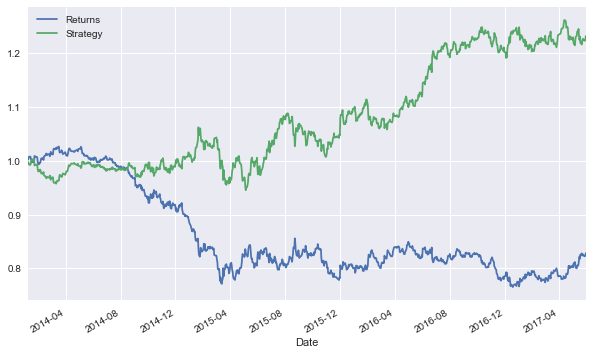

In [81]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Out-of-Sample Performance

In [82]:
cutoff = '2015-6-30'

### Training the Model

In [83]:
train = data[data.index < cutoff].copy()

In [84]:
lm.fit(train[cols], np.sign(train['Returns']))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
train['Prediction'] = lm.predict(train[cols])

In [86]:
train['Prediction'].value_counts()

-1.0    325
 1.0    134
Name: Prediction, dtype: int64

In [87]:
np.sign(train['Prediction'] * train['Returns']).value_counts()

 1.0    246
-1.0    213
dtype: int64

In [88]:
train['Strategy'] = train['Prediction'] * train['Returns']

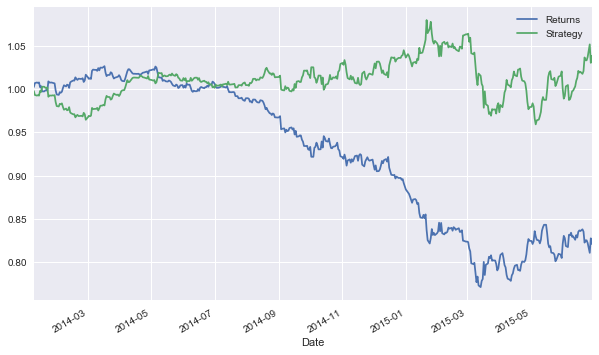

In [89]:
train[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

### Testing the Model

In [90]:
test = data[data.index >= cutoff].copy()

In [91]:
test['Prediction'] = lm.predict(test[cols])

In [92]:
test['Prediction'].value_counts()

-1.0    421
 1.0    175
Name: Prediction, dtype: int64

In [93]:
np.sign(test['Prediction'] * test['Returns']).value_counts()

 1.0    323
-1.0    273
dtype: int64

In [94]:
test['Strategy'] = test['Prediction'] * test['Returns']

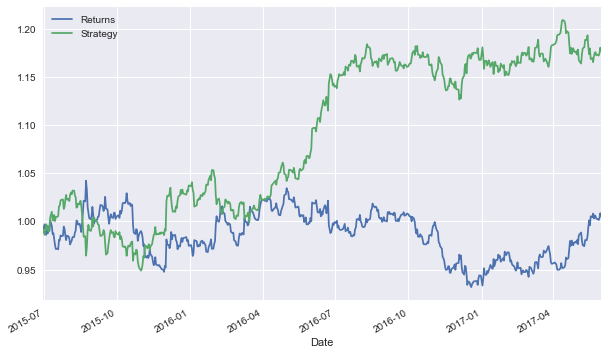

In [95]:
test[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Neural Networks from Scratch

## Using TensorFlow

### The Data

In [96]:
data = pd.read_csv('http://hilpisch.com/eurusd.csv', index_col=0,
                  parse_dates=True)

In [97]:
data.tail()

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165
2017-05-30,21:00:00,1.11842,1.12517,1.11638,1.12418,1.11882,1.12530,1.11651,1.12434,293536
2017-05-31,21:00:00,1.12418,1.12562,1.11997,1.12103,1.12434,1.12574,1.12027,1.12133,235113


In [98]:
data = data[['CloseAsk', 'CloseBid']]

In [99]:
data['Mid'] = data.mean(axis=1)

In [100]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

In [101]:
data = data[data.index > '2014-1-1']

In [102]:
cols = []
lags = 5
for lag in range(1, lags+1):
    col = 'Lag_%d' % lag
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)

In [103]:
data.head(9)

,CloseAsk,CloseBid,Mid,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,
2014-01-02,1.35931,1.35886,1.359085,-0.005884,NaN,NaN,NaN,NaN,NaN
2014-01-04,1.35965,1.35905,1.359350,0.000195,-1.0,NaN,NaN,NaN,NaN
2014-01-05,1.36286,1.36270,1.362780,0.002520,1.0,-1.0,NaN,NaN,NaN
2014-01-06,1.36163,1.36148,1.361555,-0.000899,1.0,1.0,-1.0,NaN,NaN
2014-01-07,1.35755,1.35748,1.357515,-0.002972,-1.0,1.0,1.0,-1.0,NaN
2014-01-08,1.36068,1.36069,1.360685,0.002332,-1.0,-1.0,1.0,1.0,-1.0
2014-01-09,1.36701,1.36667,1.366840,0.004513,1.0,-1.0,-1.0,1.0,1.0
2014-01-11,1.36815,1.36755,1.367850,0.000739,1.0,1.0,-1.0,-1.0,1.0
2014-01-12,1.36718,1.36705,1.367115,-0.000537,1.0,1.0,1.0,-1.0,-1.0


In [104]:
data.dropna(inplace=True)

### Importing and Verbosity

In [105]:
import tensorflow as tf

In [106]:
tf.logging.set_verbosity(tf.logging.ERROR)

### Features and Labels

In [107]:
fc = tf.contrib.layers.real_valued_column('lags', dimension=lags)

In [108]:
def get_data():
    fc = {'lags': tf.constant(np.where(data[cols].values > 0, 1, 0))}
    la = tf.constant(np.where(data['Returns'].values > 0, 1, 0))
    return fc, la

### The DNN Classifier Model

In [109]:
model = tf.contrib.learn.DNNClassifier(hidden_units=[50, 50],
                                       feature_columns=[fc])

In [110]:
model

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x125d1c2b0>, 'hidden_units': [50, 50], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x122dfea60>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

### The Deep Learning

In [111]:
%time model.fit(input_fn=get_data, steps=50)

CPU times: user 7.29 s, sys: 199 ms, total: 7.49 s
Wall time: 7.44 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x125d1c2b0>, 'hidden_units': [50, 50], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x122dfea60>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

### Prediction

In [112]:
list(model.predict(input_fn=get_data))[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [113]:
model.evaluate(input_fn=get_data, steps=1)

{'accuracy': 0.54028434,
 'accuracy/baseline_label_mean': 0.46919432,
 'accuracy/threshold_0.500000_mean': 0.54028434,
 'auc': 0.54560971,
 'global_step': 50,
 'labels/actual_label_mean': 0.46919432,
 'labels/prediction_mean': 0.46711037,
 'loss': 0.68857849,
 'precision/positive_threshold_0.500000_mean': 0.53676468,
 'recall/positive_threshold_0.500000_mean': 0.14747475}

In [114]:
data['Prediction'] = np.where(np.array(list(model.predict(input_fn=get_data))) > 0,
                              1, -1)

In [115]:
data.head()

,CloseAsk,CloseBid,Mid,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Prediction
Date,,,,,,,,,,
2014-01-08,1.36068,1.36069,1.360685,0.002332,-1.0,-1.0,1.0,1.0,-1.0,-1
2014-01-09,1.36701,1.36667,1.366840,0.004513,1.0,-1.0,-1.0,1.0,1.0,-1
2014-01-11,1.36815,1.36755,1.367850,0.000739,1.0,1.0,-1.0,-1.0,1.0,-1
2014-01-12,1.36718,1.36705,1.367115,-0.000537,1.0,1.0,1.0,-1.0,-1.0,-1
2014-01-13,1.36797,1.36783,1.367900,0.000574,-1.0,1.0,1.0,1.0,-1.0,-1


### Backtesting

In [116]:
data['Strategy'] = data['Prediction'] * data['Returns']

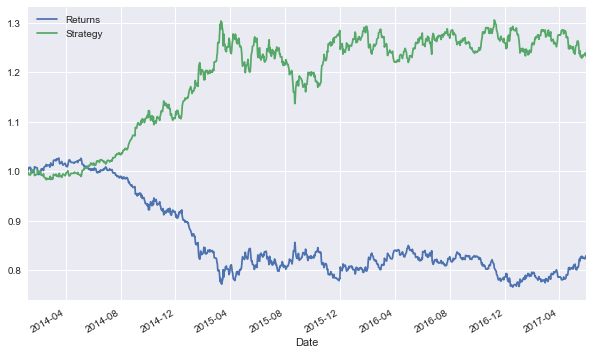

In [117]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>